In [ ]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# Any results you write to the current directory are saved as output.

In [ ]:
api_token = {"username":"umersabir","key":"f9baa2c66c22383ffce5102ddda9d051"}
import json
import zipfile
import os
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

sarscov2-ctscan-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '*.zip'

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [ ]:
X_para = []
Y_para = []
myfiles = glob.glob("COVID/*.png")
for file in myfiles:
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(img)
    Y_para.append(1)

In [ ]:
X_un , Y_un = [],[]
unfiles = glob.glob("non-COVID/*.png")
for file in unfiles:
    kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    X_un.append(img)
    Y_un.append(0)

In [ ]:
X = X_para + X_un
Y = Y_para + Y_un
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1 , random_state =42)
X = np.array(X)

In [ ]:
inp = Input(shape = (120 , 120 , 3))
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )

In [ ]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy",keras_metrics.precision(), keras_metrics.recall()])
history = model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 25 ,validation_split = 0.2 )

Epoch 1/25
56/56 [==============================] - 4s 77ms/step - loss: 1.3288 - accuracy: 0.4728 - precision: 0.4371 - recall: 0.2384 - val_loss: 0.6931 - val_accuracy: 0.5078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
56/56 [==============================] - 4s 66ms/step - loss: 0.6936 - accuracy: 0.4723 - precision: 0.5312 - recall: 0.3880 - val_loss: 0.6932 - val_accuracy: 0.4922 - val_precision: 0.5194 - val_recall: 1.0000
Epoch 3/25
56/56 [==============================] - 4s 66ms/step - loss: 0.6939 - accuracy: 0.5059 - precision: 0.5028 - recall: 0.9709 - val_loss: 0.6932 - val_accuracy: 0.4922 - val_precision: 0.5194 - val_recall: 1.0000
Epoch 4/25
56/56 [==============================] - 4s 66ms/step - loss: 0.6932 - accuracy: 0.5036 - precision: 0.5192 - recall: 0.9795 - val_loss: 0.6932 - val_accuracy: 0.4922 - val_precision: 0.5194 - val_recall: 1.0000
Epoch 5/25
56/56 [==============================] - 4s 66ms/step - loss: 0.6932 - accuracy: 0.5070 -

In [ ]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy",keras_metrics.precision(), keras_metrics.recall()])
def evaluate_model(X_train,X_test,Y_train,Y_test):
  model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 25 ,validation_split = 0.2)
  score=[]
  score=model.evaluate(np.array(X_test),np.array(Y_test))
  return score


In [ ]:
n_folds = 10
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = np.random.randint(1,1000, 1)[0])
    X = np.array(X)
    # evaluate model
    score=[]
    score = evaluate_model(X_train,X_test,Y_train,Y_test)
    print("Printing Fold " %range(n_folds))
    print("score: %.5f" %(score[0]))
    print("validation accuracy: %.5f" % (score[1]))
    print("Precision: %.5f" %(score[2]))
    print("Recacll: %.5f" %(score[3]))
    cv_scores.append(score[1])
    #model_history.append(model)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

In [ ]:
y_pre = model.predict(np.array(X_test))
y_pre = np.reshape(y_pre ,(8268,) )
Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0
np.sum(Y_test == y_pre)/8268

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(np.array(X_test))
pred = np.argmax(pred,axis = 1) 
#y_true = np.argmax(np.array(Y_test),axis = 1)
CM = confusion_matrix(np.array(Y_test), pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
#CT Images
score=[]
score=model.evaluate(np.array(X_test),np.array(Y_test))
#keras.metrics.binary_accuracy(Y_valid,pred)
print("score: %.5f" %(score[0]))
print("validation accuracy: %.5f" % (score[1]))
print("Precision: %.5f" %(score[2]))
print("Recacll: %.5f" %(score[3]))

8/8 [==============================] - 0s 12ms/step - loss: 0.6935 - accuracy: 0.4819 - precision: 0.4831 - recall: 1.0000
score: 0.69351
validation accuracy: 0.48193
Precision: 0.48313
Recacll: 1.00000


In [ ]:
#keras.metrics.binary_accuracy(Y_valid,pred)
print("score: %.5f" %(score[0]))
print("validation accuracy: %.5f" % (score[1]))
print("Precision: %.5f" %(score[2]))
print("Recacll: %.5f" %(score[3]))


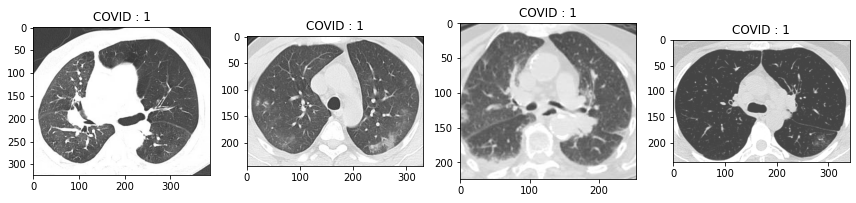

In [ ]:
parasitized_data = os.listdir('COVID/')
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('COVID' + "/" + covid_data[i])
    plt.imshow(img)
    plt.title('COVID : 1')
    plt.tight_layout()

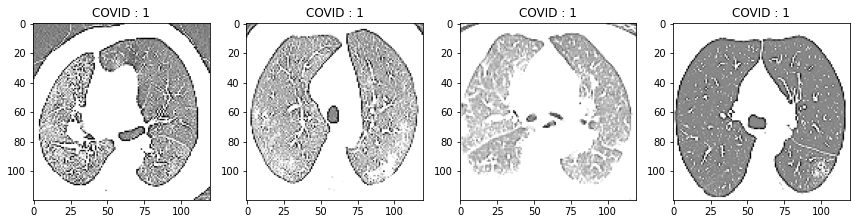

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread('COVID' + "/" + covid_data[i]) , (120,120)) , -1 , kernel)
    plt.imshow(img)
    plt.title('COVID : 1')
    plt.tight_layout()

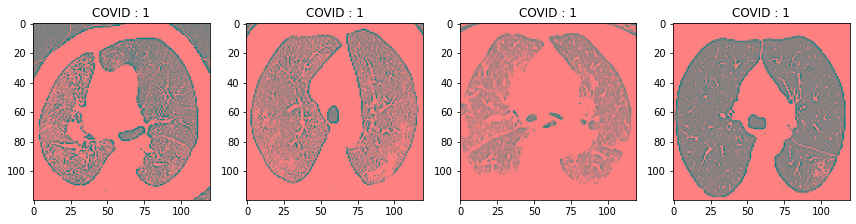

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread('COVID' + "/" + covid_data[i]) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    plt.imshow(image_yuv)
    plt.title('COVID : 1')
    plt.tight_layout()

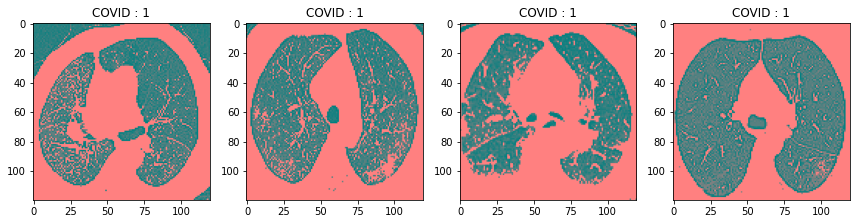

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread('COVID' + "/" + covid_data[i]) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    plt.imshow(image_yuv)
    plt.title('COVID : 1')
    plt.tight_layout()

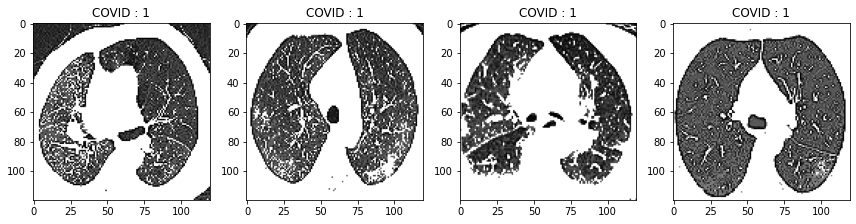

In [ ]:
covid_data = os.listdir('COVID')
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread('COVID' + "/" + covid_data[i]) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    plt.imshow(image)
    plt.title('COVID : 1')
    plt.tight_layout()

In [ ]:
Uninfected_data = os.listdir('non-COVID/')
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    #img = cv2.imread('cell_images/cell_images/Uninfected' + "/" + Uninfected_data[i])
    #plt.imshow(img)
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread('non-COVID' + "/" + Uninfected_data[i]) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    plt.imshow(image_yuv)
    plt.title('Non-COVID : 0')
    plt.tight_layout()
   
plt.savefig('non-COVID.jpg',  dpi=1000,bbox_inches='tight')
files.download('non-COVID.jpg')
plt.show()

#kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
#img = cv2.filter2D( cv2.resize(cv2.imread('cell_images/cell_images/Uninfected' + "/" + Uninfected_data[i]) , (120,120)) , -1 , kernel)
#image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
#image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
#image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('non-COVID' + "/" + Uninfected_data[i])
    plt.imshow(img)
    #kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    #img = cv2.filter2D( cv2.resize(cv2.imread('cell_images/cell_images/Uninfected' + "/" + Uninfected_data[i]) , (120,120)) , -1 , kernel)
    plt.imshow(img)
    plt.title('Non-COVID : 0')
    plt.tight_layout() 
plt.savefig('non-COVIDwithoutPreprocessing.jpg',  dpi=1000,bbox_inches='tight')
files.download('non-COVIDwithoutPreprocessing.jpg')
plt.show()



One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.
**bold text**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

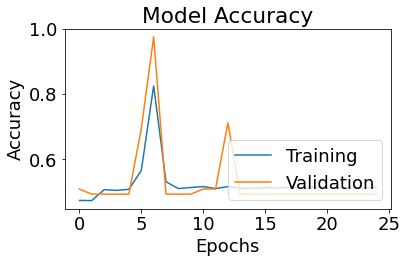

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'], loc='lower right')
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.savefig('training & validation accuracyCTImageW.pdf',  dpi=1000,bbox_inches='tight')
files.download('training & validation accuracyCTImageW.pdf')
plt.show()

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc='lower right')
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.savefig('training & validation accuracyCTImageLoss.pdf',  dpi=1000,bbox_inches='tight')
files.download('training & validation accuracyCTImageLoss.pdf')
plt.show()

In [ ]:
plt.plot(history.history["precision"])
plt.plot(history.history["val_precision"])
plt.title("Model Precision")
plt.ylabel("Precision")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc='lower right')
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.savefig('training & validation accuracyCTImagePrecision.pdf',  dpi=1000,bbox_inches='tight')
files.download('training & validation accuracyCTImagePrecision.pdf')
plt.show()

In [ ]:
plt.plot(history.history["recall"])
plt.plot(history.history["val_recall"])
plt.title("Model Recall")
plt.ylabel("Recall")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc='lower right')
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.savefig('training & validation accuracyCTImageRecall.pdf',  dpi=1000,bbox_inches='tight')
files.download('training & validation accuracyCTImageRecall.pdf')
plt.show()

In [ ]:
!pip install -q keras_metrics
import keras_metrics